In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

data = pd.read_csv('stud_math.csv')

In [19]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [21]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [22]:
# приведем название столбцов к единому виду
data.rename(columns={'studytime, granular': 'studytime_granular'}, inplace=True)

In [23]:
# сформируем списки столбцов с количественными и номинативными переменными

list_numeric = []
list_nominative = []

for elem in data.columns:
    if data[elem].dtype == 'O':
        list_nominative.append(elem)
    else:
        list_numeric.append(elem)
        
#check
print('numeric = ', list_numeric)
print()
print('nominative = ', list_nominative)
print()

numeric =  ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'studytime_granular', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']

nominative =  ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']



In [24]:
# избавимся от NaN в столбцах с количественными переменными
data = data.dropna(subset=list_numeric)

In [25]:
# заменим NaN на unknown в столбцах с номинативными переменными
data = data.fillna(value='unknown')

# Построим гистограммы и описательные таблицы для столбцов с количественными признаками

count    263.000000
mean      52.110266
std       21.956220
min        0.000000
25%       42.500000
50%       55.000000
75%       65.000000
max      100.000000
Name: score, dtype: float64

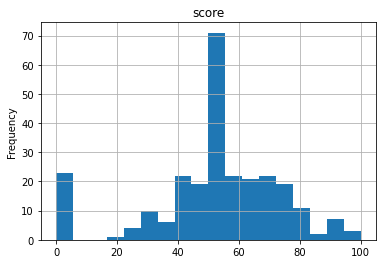

In [26]:
# начнем с результирующей переменной
data[list_numeric[12]].plot(kind = 'hist', grid = True, title = list_numeric[12], bins=data[list_numeric[12]].nunique())
data[list_numeric[12]].describe()

In [27]:
# в исходном датасете много учеников либо пропустивших тест, либо заваливших его на 0 баллов
# сформируем два дата сета - для сдавших тест учеников и для тех, кто не сдавал или набрал 0 баллов

data_1 = data.loc[data[list_numeric[12]].between(1, 100)]
data_0 = data.loc[data[list_numeric[12]].between(0, 0)]

In [28]:
data_1.describe()

,age,Medu,Fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
count,240.000000,240.000000,240.000000,240.00000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,16.700000,2.837500,2.741667,1.46250,2.012500,0.283333,-6.037500,3.904167,3.241667,3.079167,3.429167,8.483333,57.104167
std,1.287858,1.083661,2.643365,0.68962,0.845768,0.686795,2.537305,0.961162,1.014504,1.057936,1.376424,28.724338,15.559630
min,15.000000,0.000000,0.000000,1.00000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,20.000000
25%,16.000000,2.000000,2.000000,1.00000,1.000000,0.000000,-6.000000,3.750000,3.000000,2.000000,2.000000,2.000000,45.000000
50%,17.000000,3.000000,3.000000,1.00000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,3.000000,4.000000,55.000000
75%,18.000000,4.000000,4.000000,2.00000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.00000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [29]:
data_0.describe()

,age,Medu,Fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.0,23.0
mean,17.043478,2.478261,2.434783,1.434783,2.043478,0.826087,-6.130435,3.956522,3.000000,3.173913,3.521739,0.0,0.0
std,1.364427,1.081647,1.079818,0.589768,0.928256,1.072473,2.784769,0.928256,0.738549,1.302172,1.309739,0.0,0.0
min,15.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-12.000000,2.000000,1.000000,1.000000,1.000000,0.0,0.0
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-7.500000,3.500000,3.000000,2.000000,3.000000,0.0,0.0
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,0.0,0.0
75%,18.000000,3.500000,3.000000,2.000000,2.500000,1.000000,-3.000000,5.000000,3.000000,4.000000,5.000000,0.0,0.0
max,19.000000,4.000000,4.000000,3.000000,4.000000,3.000000,-3.000000,5.000000,4.000000,5.000000,5.000000,0.0,0.0


# Вывод по сравнению средних, макс и мин data_1, data_0

Текст

count    240.000000
mean      16.700000
std        1.287858
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

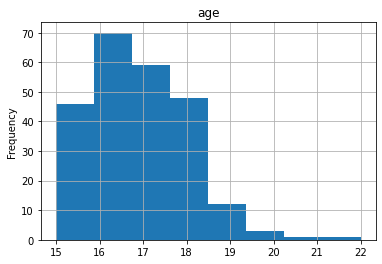

In [30]:
data_1[list_numeric[0]].plot(kind = 'hist', grid = True, title = list_numeric[0]
                             , bins=data_1[list_numeric[0]].nunique())
data_1[list_numeric[0]].describe()

count    240.000000
mean       2.837500
std        1.083661
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

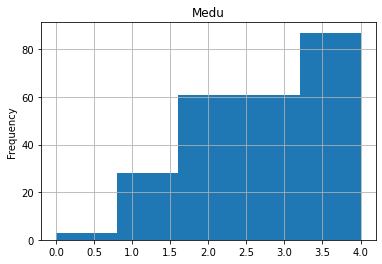

In [31]:
data_1[list_numeric[1]].plot(kind = 'hist', grid = True, title = list_numeric[1]
                             , bins=data_1[list_numeric[1]].nunique())
data_1[list_numeric[1]].describe()


count    240.000000
mean       2.741667
std        2.643365
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       40.000000
Name: Fedu, dtype: float64

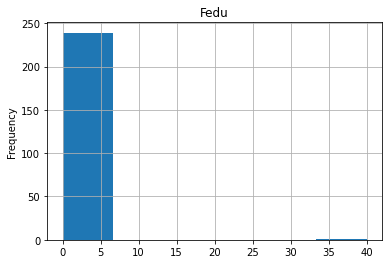

In [32]:
data_1[list_numeric[2]].plot(kind = 'hist', grid = True, title = list_numeric[2]
                             , bins=data_1[list_numeric[2]].nunique())
data_1[list_numeric[2]].describe()


count    239.000000
mean       2.585774
std        1.076861
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Fedu, dtype: float64

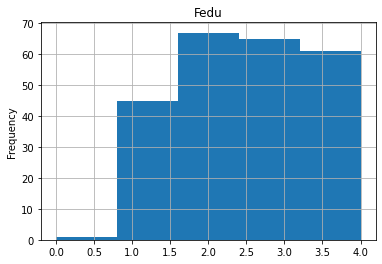

In [33]:
# избавимся от ошибочного значения = 40
data_1 = data_1.loc[data_1[list_numeric[2]].between(0, 4)]

#check
data_1[list_numeric[2]].plot(kind = 'hist', grid = True, title = list_numeric[2]
                             , bins=data_1[list_numeric[2]].nunique())
data_1[list_numeric[2]].describe()

count    239.000000
mean       1.456067
std        0.683813
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

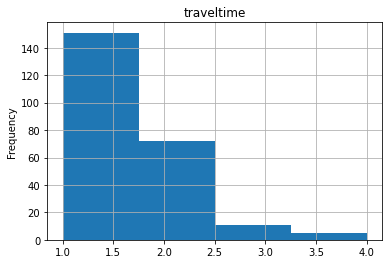

In [34]:
data_1[list_numeric[3]].plot(kind = 'hist', grid = True, title = list_numeric[3]
                             , bins=data_1[list_numeric[3]].nunique())
data_1[list_numeric[3]].describe()


count    239.000000
mean       2.008368
std        0.845113
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

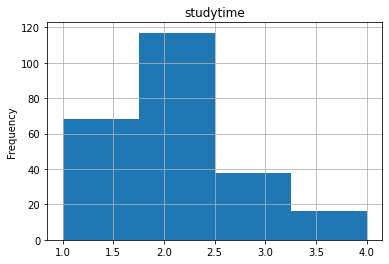

In [35]:
data_1[list_numeric[4]].plot(kind = 'hist', grid = True, title = list_numeric[4]
                             , bins=data_1[list_numeric[4]].nunique())
data_1[list_numeric[4]].describe()


count    239.000000
mean       0.284519
std        0.687990
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

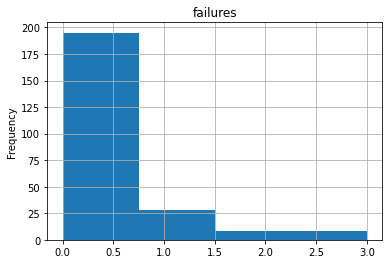

In [36]:
data_1[list_numeric[5]].plot(kind = 'hist', grid = True, title = list_numeric[5]
                             , bins=data_1[list_numeric[5]].nunique())
data_1[list_numeric[5]].describe()


count    239.000000
mean       0.284519
std        0.687990
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

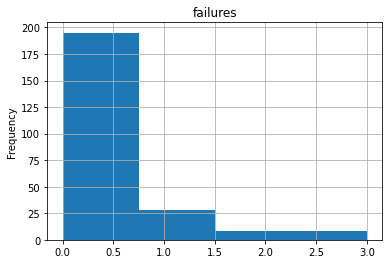

In [37]:
data_1[list_numeric[5]].plot(kind = 'hist', grid = True, title = list_numeric[5]
                             , bins=data_1[list_numeric[5]].nunique())
data_1[list_numeric[5]].describe()


count    239.000000
mean      -6.025105
std        2.535338
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime_granular, dtype: float64

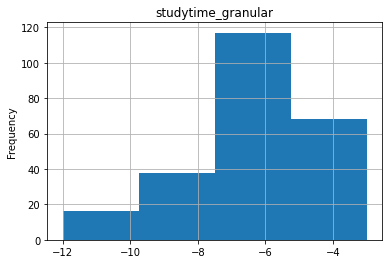

In [38]:
data_1[list_numeric[6]].plot(kind = 'hist', grid = True, title = list_numeric[6]
                             , bins=data_1[list_numeric[6]].nunique())
data_1[list_numeric[6]].describe()


count    239.000000
mean       3.899582
std        0.960545
min       -1.000000
25%        3.500000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

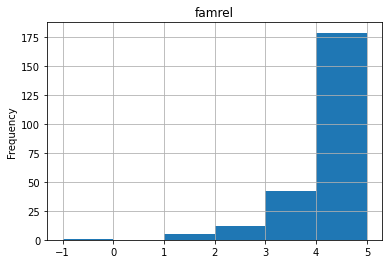

In [39]:
data_1[list_numeric[7]].plot(kind = 'hist', grid = True, title = list_numeric[7]
                             , bins=data_1[list_numeric[7]].nunique())
data_1[list_numeric[7]].describe()


count    238.000000
mean       3.920168
std        0.908198
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

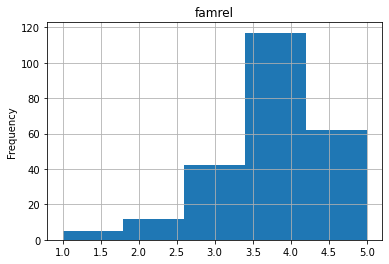

In [40]:
# избавимся от ошибочного значения < 1
data_1 = data_1.loc[data_1[list_numeric[7]].between(1, 5)]

#check
data_1[list_numeric[7]].plot(kind = 'hist', grid = True, title = list_numeric[7]
                             , bins=data_1[list_numeric[7]].nunique())
data_1[list_numeric[7]].describe()


count    238.000000
mean       3.252101
std        1.012316
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

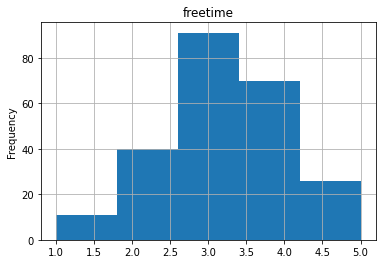

In [41]:
data_1[list_numeric[8]].plot(kind = 'hist', grid = True, title = list_numeric[8]
                             , bins=data_1[list_numeric[8]].nunique())
data_1[list_numeric[8]].describe()


count    238.000000
mean       3.088235
std        1.057716
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

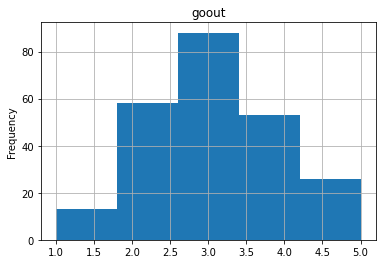

In [42]:
data_1[list_numeric[9]].plot(kind = 'hist', grid = True, title = list_numeric[9]
                             , bins=data_1[list_numeric[9]].nunique())
data_1[list_numeric[9]].describe()


count    238.000000
mean       3.420168
std        1.377920
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

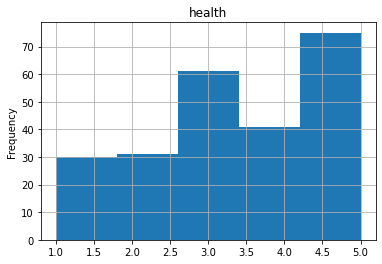

In [43]:
data_1[list_numeric[10]].plot(kind = 'hist', grid = True, title = list_numeric[10]
                              , bins=data_1[list_numeric[10]].nunique())
data_1[list_numeric[10]].describe()


count    238.000000
mean       8.478992
std       28.841586
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

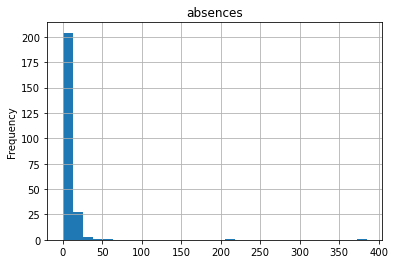

In [44]:
data_1[list_numeric[11]].plot(kind = 'hist', grid = True, title = list_numeric[11]
                              , bins=data_1[list_numeric[11]].nunique())
data_1[list_numeric[11]].describe()


In [47]:
# оценим межквартильный размах и очистим датасет от выбросов

IQR = data_1.absences.quantile(0.75) - data_1.absences.quantile(0.25)
perc25 = data_1.absences.quantile(0.25)
perc75 = data_1.absences.quantile(0.75)

data_1 = data_1.loc[data_1[list_numeric[11]].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]


count    222.000000
mean       4.698198
std        4.506797
min        0.000000
25%        1.250000
50%        4.000000
75%        7.750000
max       17.000000
Name: absences, dtype: float64

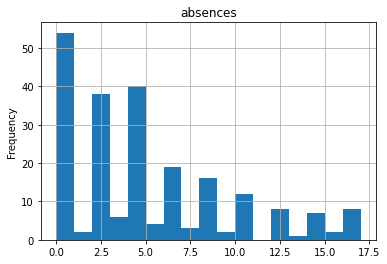

In [48]:
data_1[list_numeric[11]].plot(kind = 'hist', grid = True, title = list_numeric[11]
                            , bins=data_1[list_numeric[11]].nunique())
data_1[list_numeric[11]].describe()


# Корреляционный анализ

In [53]:
correlation_1 = data_1.corr()
correlation_1

,age,Medu,Fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000e+00,-0.159766,-0.171491,0.105554,-0.052846,0.225853,0.052846,0.054601,0.015426,0.097144,-1.256702e-17,0.144231,-0.140340
Medu,-1.597657e-01,1.000000,0.617478,-0.169433,0.082880,-0.181728,-0.082880,-0.011283,-0.009612,0.042483,-7.889182e-02,0.128683,0.148115
Fedu,-1.714905e-01,0.617478,1.000000,-0.194718,-0.019255,-0.300813,0.019255,-0.007097,-0.048592,-0.006238,3.785785e-03,0.004369,0.078152
traveltime,1.055543e-01,-0.169433,-0.194718,1.000000,-0.154411,0.046041,0.154411,-0.014043,0.057359,-0.018331,6.395537e-02,-0.046996,-0.083978
studytime,-5.284581e-02,0.082880,-0.019255,-0.154411,1.000000,-0.132307,-1.000000,0.084149,-0.163605,-0.103747,-1.116880e-01,-0.029295,0.136097
failures,2.258531e-01,-0.181728,-0.300813,0.046041,-0.132307,1.000000,0.132307,-0.001595,0.191020,0.055841,8.772115e-02,0.159658,-0.280266
studytime_granular,5.284581e-02,-0.082880,0.019255,0.154411,-1.000000,0.132307,1.000000,-0.084149,0.163605,0.103747,1.116880e-01,0.029295,-0.136097
famrel,5.460071e-02,-0.011283,-0.007097,-0.014043,0.084149,-0.001595,-0.084149,1.000000,0.173230,0.033760,1.315380e-01,-0.074305,0.051184
freetime,1.542552e-02,-0.009612,-0.048592,0.057359,-0.163605,0.191020,0.163605,0.173230,1.000000,0.299833,1.215194e-01,0.110987,-0.004420
goout,9.714362e-02,0.042483,-0.006238,-0.018331,-0.103747,0.055841,0.103747,0.033760,0.299833,1.000000,5.737783e-02,0.157884,-0.218158


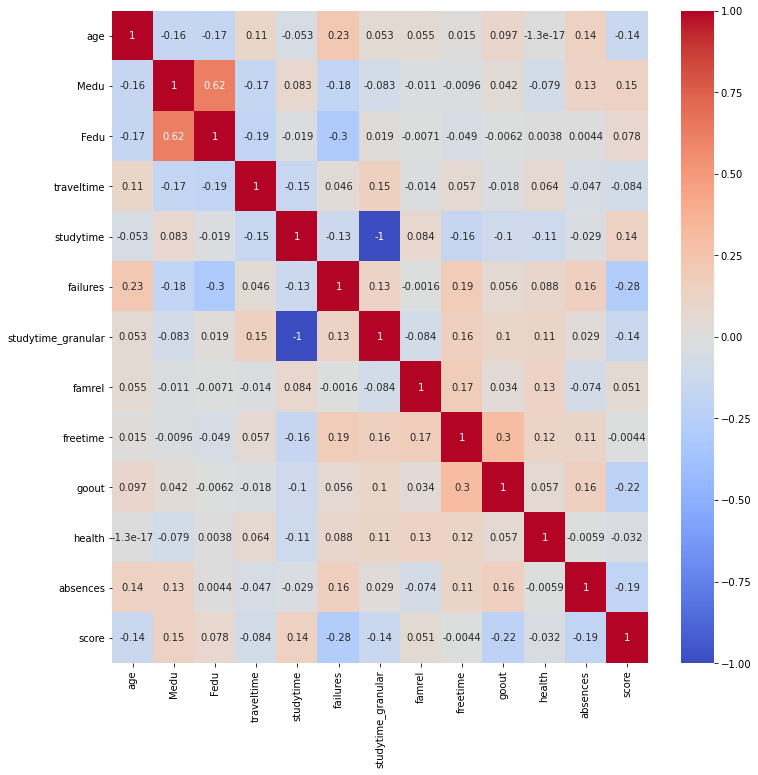

In [57]:
sns.heatmap(correlation_1, cmap = 'coolwarm', annot = True)
fig = plt.gcf()
fig.set_size_inches(12, 12)


## Краткие выводы по корреляционному анализу

Переменные studytime и studytime_granular обладают абсолютной обратной зависимостью.
Переменную studytime_granular можно исключить из модели.

Достаточно сильной парной корреляцией обладают признаки образования родителей - Medu, Fedu.
При этом влияние этих признаков на итоговый балл score несущественно.
Можно допустить удаление из модели переменной Medu как менее значимой.

Наибольше положительной корреляцией с результатами экзамена обладают признаки Medu и Studytime.
Несмотря на то, что образование отца и время занятий оказывают положительное влияние на результат экзамена,
степень корреляции незначительна - 0.15 и 0.14 соответственно.

В то же время, наибольшая обратная зависимость у score наблюдается с внеучебными неудачами (failures = -0.28),
частотой прогулок с друзьями (goout = -0.22) и количеством пропусков занятий (absences = -0.19).
Стоит отметить, что указанные степени корреляции также являются несущественными и для построения модели требуются дополнительные исследования.

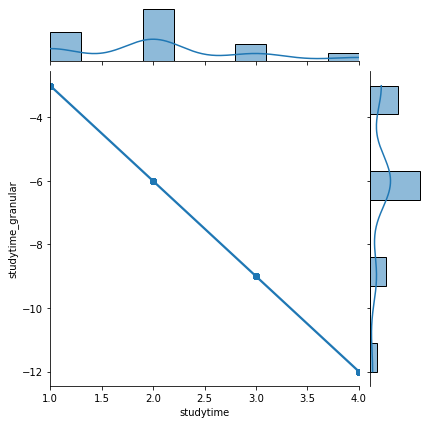

In [58]:
sns.jointplot(x = 'studytime', y = 'studytime_granular', data = data_1, kind = 'reg')

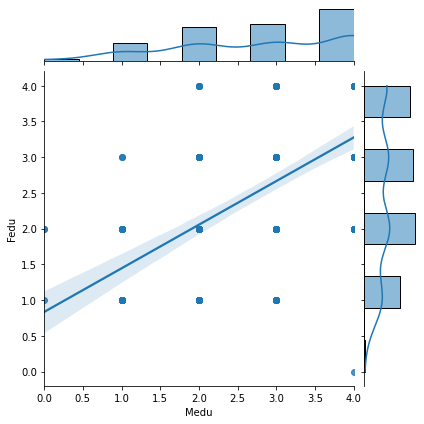

In [59]:
sns.jointplot(x = 'Medu', y = 'Fedu', data = data_1, kind = 'reg')

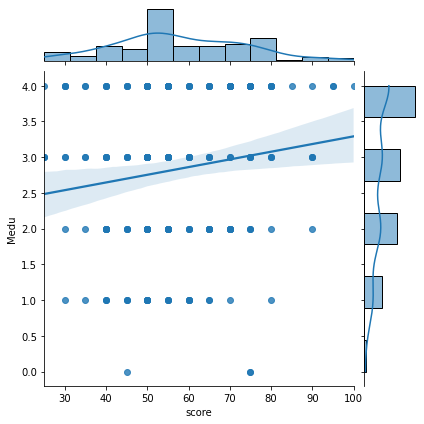

In [60]:
sns.jointplot(x = 'score', y = 'Medu', data = data_1, kind = 'reg')

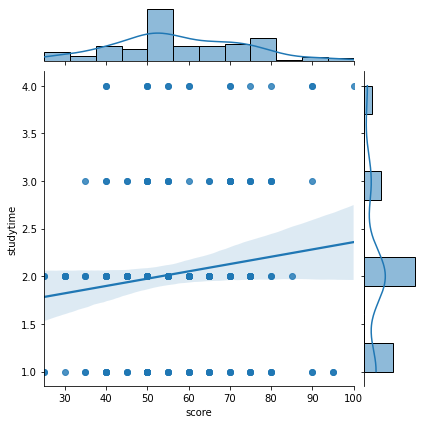

In [61]:
sns.jointplot(x = 'score', y = 'studytime', data = data_1, kind = 'reg')

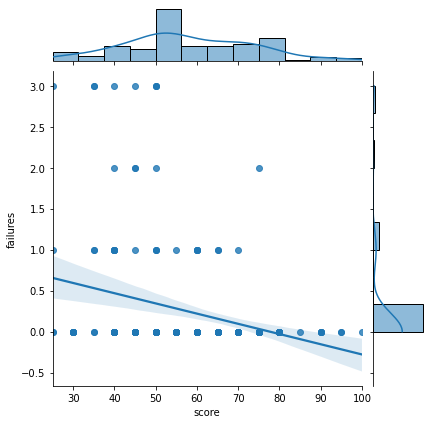

In [62]:
sns.jointplot(x = 'score', y = 'failures', data = data_1, kind = 'reg')

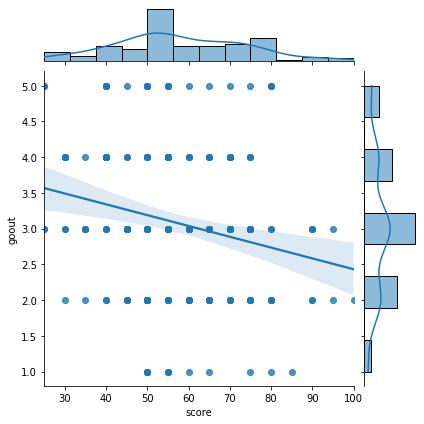

In [63]:
sns.jointplot(x = 'score', y = 'goout', data = data_1, kind = 'reg')

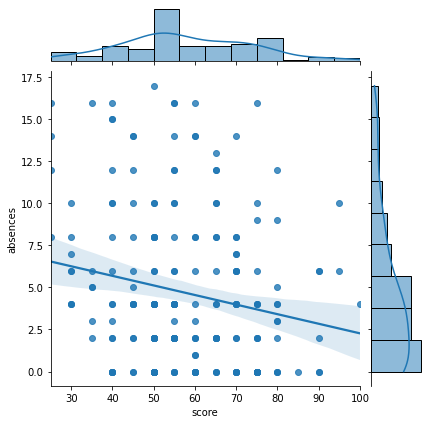

In [64]:
sns.jointplot(x = 'score', y = 'absences', data = data_1, kind = 'reg')

# Анализ номинативных признаков

Текст

In [81]:
# проверим выборку на наличие ошибочных значений в номинативных признаках
for elem in list_nominative:
    print('Уникальные значения в столбце {}: {}'.format(elem, data_1[str(elem)].unique()))

Уникальные значения в столбце school: ['GP' 'MS']
Уникальные значения в столбце sex: ['F' 'M']
Уникальные значения в столбце address: ['U' 'unknown' 'R']
Уникальные значения в столбце famsize: ['unknown' 'GT3' 'LE3']
Уникальные значения в столбце Pstatus: ['A' 'unknown' 'T']
Уникальные значения в столбце Mjob: ['at_home' 'health' 'other' 'services' 'teacher' 'unknown']
Уникальные значения в столбце Fjob: ['teacher' 'other' 'unknown' 'health' 'services' 'at_home']
Уникальные значения в столбце reason: ['course' 'other' 'home' 'reputation' 'unknown']
Уникальные значения в столбце guardian: ['mother' 'father' 'other' 'unknown']
Уникальные значения в столбце schoolsup: ['yes' 'no' 'unknown']
Уникальные значения в столбце famsup: ['no' 'yes' 'unknown']
Уникальные значения в столбце paid: ['no' 'unknown' 'yes']
Уникальные значения в столбце activities: ['no' 'yes' 'unknown']
Уникальные значения в столбце nursery: ['yes' 'no' 'unknown']
Уникальные значения в столбце higher: ['yes' 'unknown' '

In [102]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=data_1.loc[data_1.loc[:, column].isin(
                    data_1.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

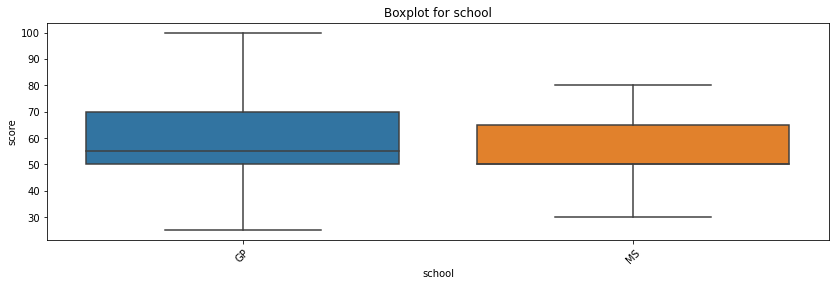

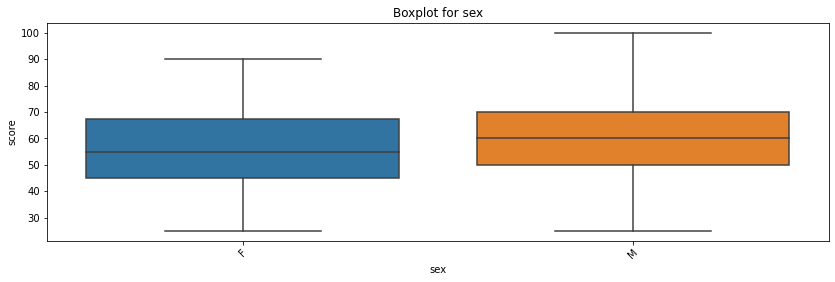

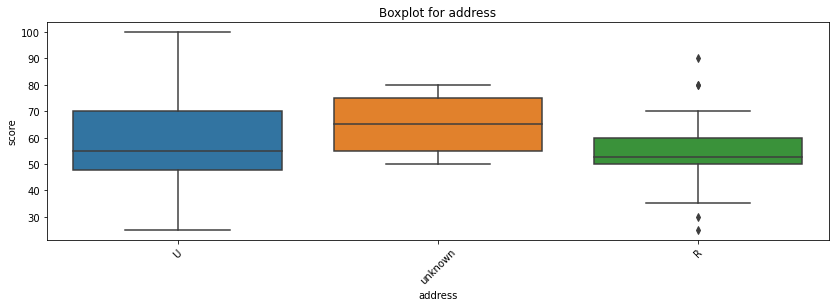

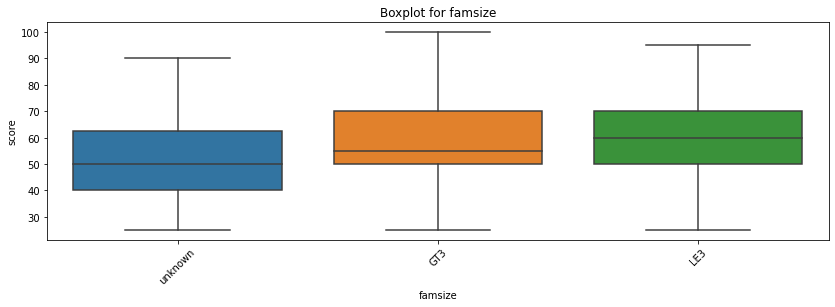

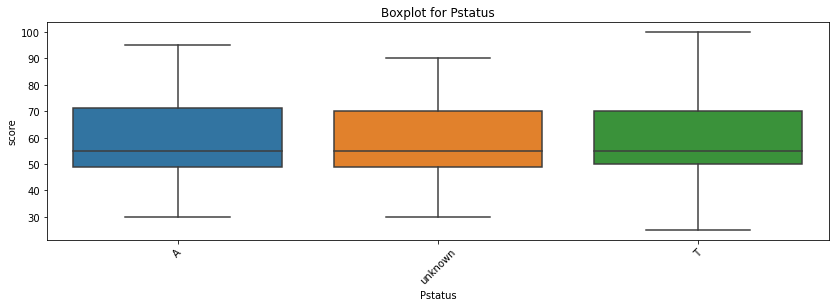

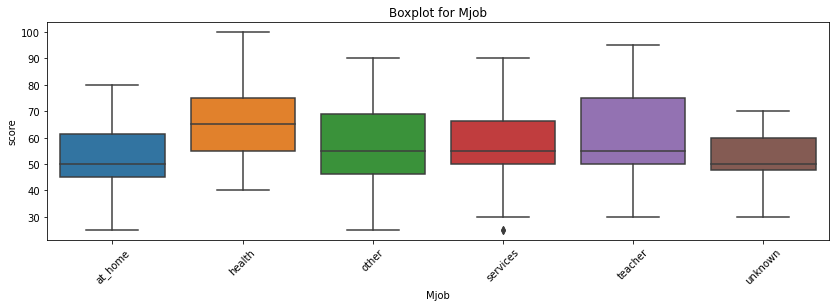

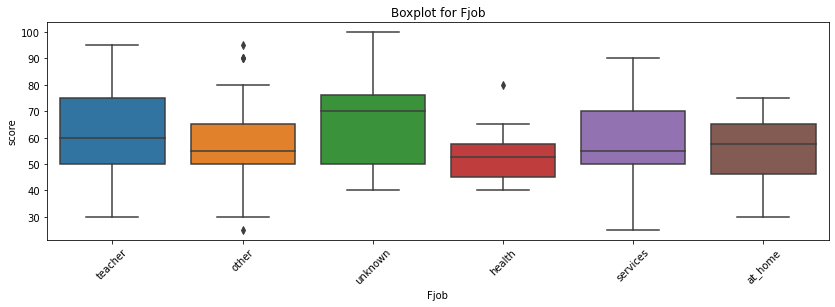

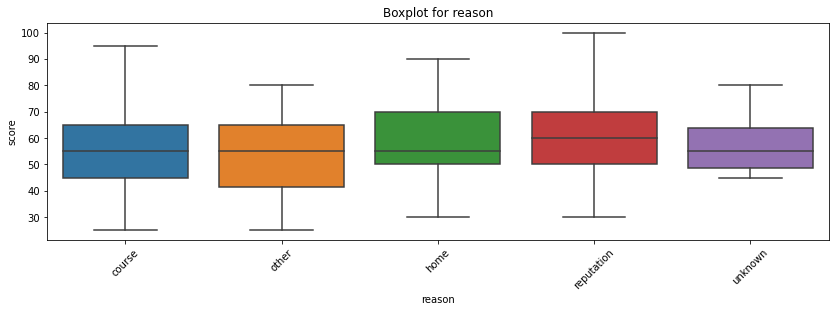

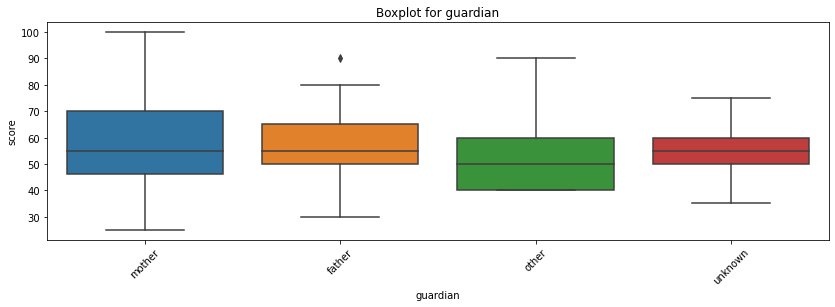

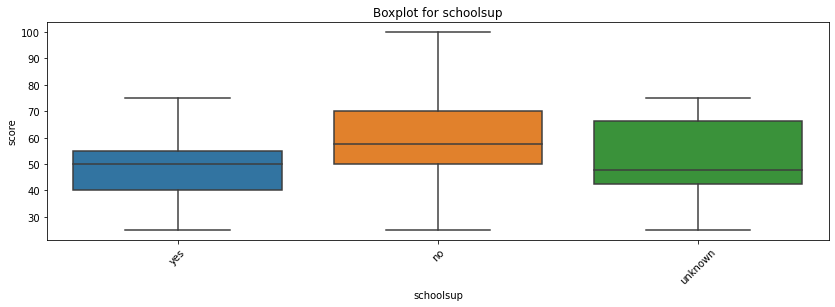

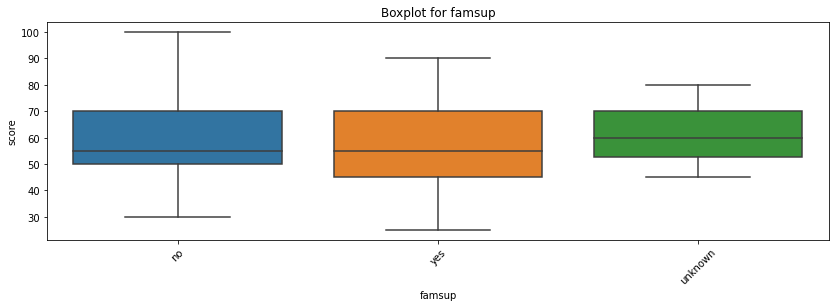

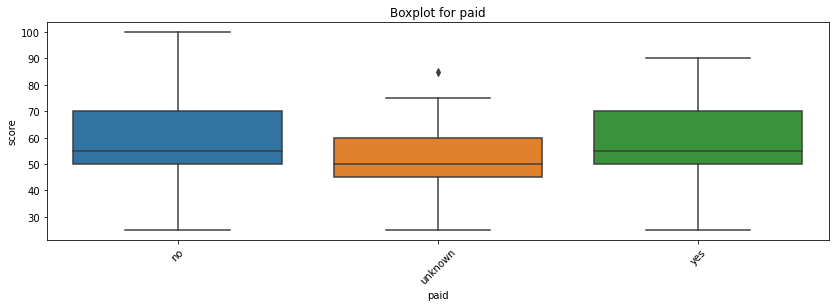

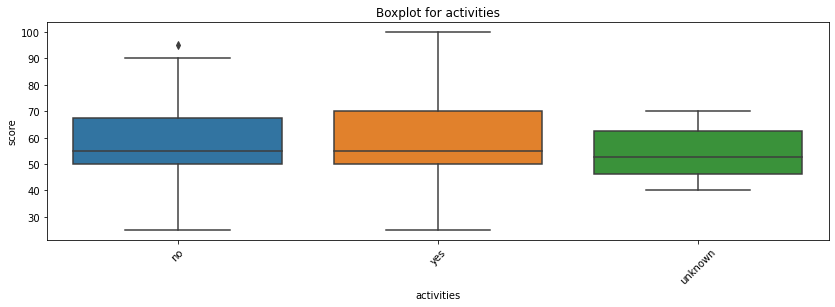

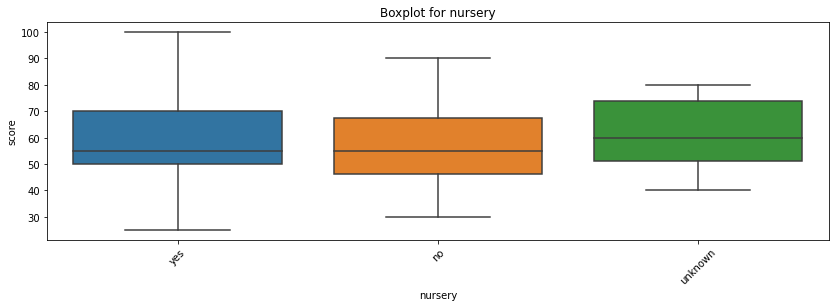

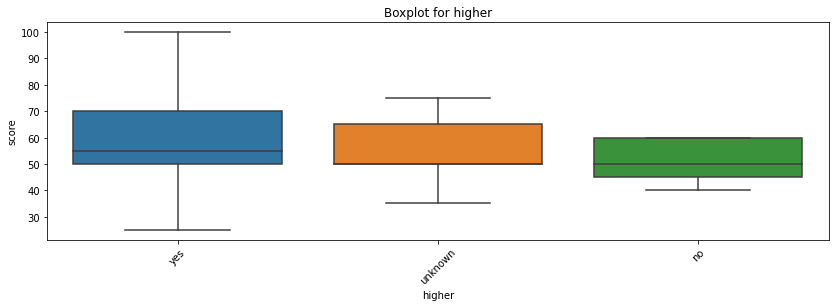

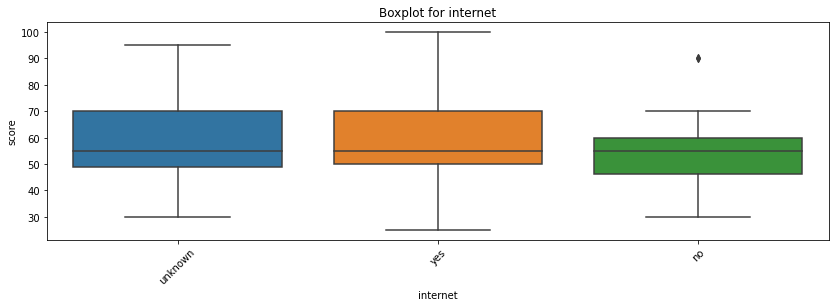

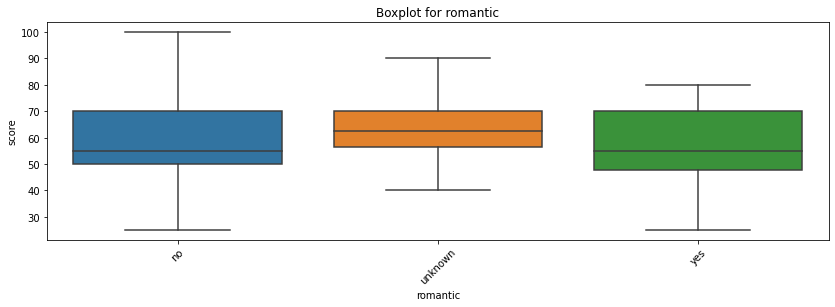

In [103]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus'
           , 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup'
           , 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

# Тестирование номинативных переменных

Текст

In [104]:
def get_stat_dif(column):
    cols = data_1.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(data_1.loc[data_1.loc[:, column] == comb[0], 'score'],
                     data_1.loc[data_1.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.1/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [105]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus'
           , 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup'
           , 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки Fjob
Найдены статистически значимые различия для колонки schoolsup
